In [1]:
import pandas as pd # python Lib used to work with csv,xcel files
import numpy as np # python Lib used to work with matrix and other Op
import matplotlib.pyplot as plt # python Lib used to visualize the graph
from sklearn.preprocessing import StandardScaler # check notes (HW)

# Mount Google Drive
from google.colab import drive # mount operation
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
data = pd.read_csv("/content/drive/My Drive/385L/house_rent_data.csv") # access the file within drive and store in the data var
data.head(11) # show what is in the data (default shows 5)
#data.tail()

,Size (sq. ft.),Distance (miles),House Rent ($)
0,498,11.9,675
1,513,8.6,750
2,621,8.3,800
3,710,3.4,965
4,650,7.5,855
5,620,5.1,790
6,560,4.6,740
7,780,8.1,810
8,450,5.4,710
9,790,4.5,940


In [4]:
# Print column names
col_names = data.columns #.columns ==> pandas library function
                          # access column names from "data" variable
print(col_names)
print()

# Select features (first two columns) and target (last column)
X = data.iloc[:, 0:2] #iloc = index location
                      # 0, 1 (upto 2)
y = data.iloc[:, -1]  # -1 is last idx

# Print X and y to inspect
print(X)
print(y)

Index(['Size (sq. ft.)', 'Distance (miles)', 'House Rent ($)'], dtype='object')

   Size (sq. ft.)  Distance (miles)
0             498              11.9
1             513               8.6
2             621               8.3
3             710               3.4
4             650               7.5
5             620               5.1
6             560               4.6
7             780               8.1
8             450               5.4
9             790               4.5
0    675
1    750
2    800
3    965
4    855
5    790
6    740
7    810
8    710
9    940
Name: House Rent ($), dtype: int64


In [5]:
# Normalize X using StandardScaler
X_scaled = StandardScaler().fit_transform(X)
# .fit_transform() computes the mean and standard deviation of each feature
# and applies the standardization
# The result is a scaled version of X where:
#     mean = 0
#     standard deviation = 1

# Print scaled features
print(X_scaled)

[[-1.09582295  2.10333853]
 [-0.9602013   0.75818017]
 [ 0.0162746   0.63589304]
 [ 0.82096307 -1.36146331]
 [ 0.27847646  0.30979405]
 [ 0.00723315 -0.66850294]
 [-0.53525345 -0.87231482]
 [ 1.45386411  0.55436829]
 [-1.52981224 -0.54621582]
 [ 1.54427855 -0.91307719]]


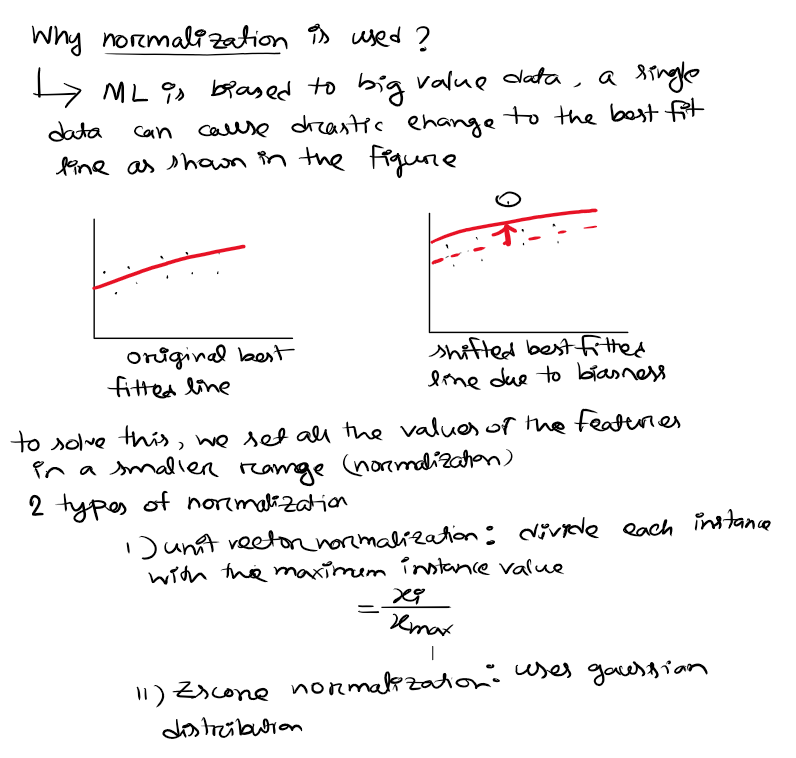

In [7]:
def cost_rss(X, y, w): # calculate the residual
# X → features
# y → target values
# w → weight vector
# Compute predicted values with bias
    y_hat = np.add(X.dot(w[1:]), w[0]) # hypotheis equation
    # w[1:] terms , w[0] bias
    # X.dot() → matrix multiplication between feature & weights
    # np.add() → adds bias to every prediction
    # y_hat now holds the predicted values

    # Calculate squared residuals
    residuals = (y_hat - y) ** 2 # (y_hat - y) ==> prediction error

    # Return sum of squared residuals
    return np.sum(residuals) # np.sum(residuals) ==> add all squared errors together
     # This is the RSS (Residual Sum of Squares)

In [ ]:
def update_weights(X, y, w, alpha, epochs):
  # X → features
  # y → true target values
  # w → weight vectors
  # alpha ==> learning rate
  # epochs ==> number of iterations
    cost_hist = [0] * epochs # create an empty list to store cost value at each epoch

    for i in range(epochs):
        y_hat = np.add(X.dot(w[1:]), w[0]) # hypothesis equation
        loss = y_hat - y # prediction error

        # Add bias column manually to match w shape
        # determine the gradient basically
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X]) # hstack ==>horizontal stack (recheck)  shape==> matrix shape (row, col) access
        # np.ones((X.shape[0], 1)) → create a matrix of 1s
        # X.shape[0] → number of rows of X
        # np.hstack(...) → horizontally stack bias column with X
        # Now first column corresponds to bias

        grad = X_with_bias.T.dot(loss) # T ==> transpose
        # dot(loss) ==> multiply with error vector

        # Update weights (including bias)
        w = w - alpha * grad  # new_weight = old_weight - learning_rate × gradient
        cost_hist[i] = cost_rss(X, y, w) # Store the cost after weight update for each iteration

    return w, cost_hist

In [ ]:
# Prepare input: add bias column manually for full weight vector
X_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
# np.ones(....) ==> create a matrix of 1s (for bias term)
# X_scaled.shape[0] ==> number of rows (data points)
# np.hstack(...) → stack bias column with scaled features horizontally


# Initialize weights (w0 + weights for each feature)
w_init = np.zeros(X_with_bias.shape[1])
# zero initialization of weights


# Set learning rate and number of iterations
alpha = 0.001 # how big each gradient step is
epochs = 200 # number of iterations to run gradient descent

# Train the model
final_w, cost_history = update_weights(X_scaled, y.values, w_init, alpha, epochs)

# X_scaled ==> normalized features
# y.values ==> actual target values as NumPy array

# final_w ==> optimized weights (all)
# cost_history ==> RSS cost at each epoch


Final Weights: [695.84733125  55.75675144 -32.06423476]


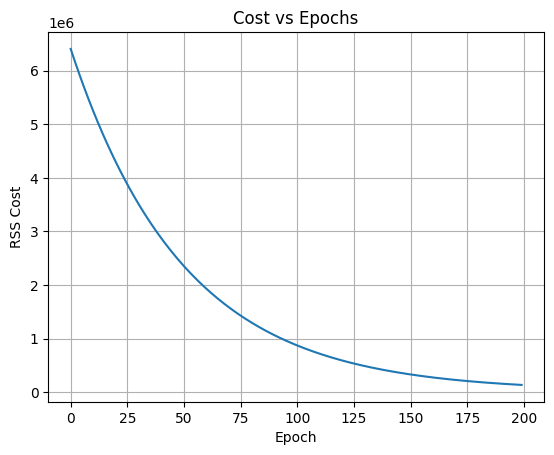

In [ ]:
# Print the learned weights
print("Final Weights:", final_w)

# Plot the cost over time
plt.plot(range(epochs), cost_history)
plt.xlabel("Epoch")
plt.ylabel("RSS Cost")
plt.title("Cost vs Epochs")
plt.grid(True)
plt.show()
